# BioDendro Quick Start Pipeline

The BioDendro pipeline automates the process of binning and hierarchically clustering
MSMS spectra based on the presence of common ions.

The quick start example executes all parameters (default and/or user defined) in a single line.

The pipeline then allows in-line interrogation of the clusters as well as exported results for offline analysis.

A step-by-step analysis is available in the `longer-workflow.ipynb` notebook at the BioDendro repository.

In [1]:
# Load modules

import os
import plotly
import BioDendro
import copy

#### To get a list of possible parameters and defaults you can run `help(BioDendro.pipeline)`.

In [2]:
help(BioDendro.pipeline)

Help on function pipeline in module BioDendro:

pipeline(mgf_path, components_path, neutral=False, cutoff=0.6, bin_threshold=0.0008, clustering_method='jaccard', processed='processed.xlsx', results_dir=None, out_html='simple_dendrogram.html', width=900, height=1200, quiet=False, scaling=False, filtering=False, eps=0.6, mz_tol=0.002, retention_tol=5, **kwargs)
    Runs the BioDendro pipeline.
    
    BioDentro takes an MGF and a list of components, finds MSMS spectra
    matching your components, and writes out useful summaries of clusters
    based on shared ion spectra
    
    Minimal example:
    >>> tree = BioDendro.pipeline("MSMS.mgf", "component_list.txt")
    
    Required parameters:
    mgf_path           Name of .mgf file
    components_path    Name of .txt file
    
    Optional parameters:
    parameter          description
                       default value
                       user options
                       
    mz_tol             m/z tolerance window to align M

The main `pipeline` function runs the full pipeline (i.e. reading files, clustering, and plotting).
Minimum requirements are an MGF file and a component list.
Note that by default, the results will be saved to a folder in your current working directory using the name `results_<datetime>` where datetime will be the date and current time of day in `hhmmss` format.
This is to avoid overwriting data in multiple runs.

In [4]:
# Run the complete BioDendro pipeline

tree = BioDendro.pipeline("Fireflies_MSMS.mgf", "Fireflies_feature_list.txt", clustering_method="braycurtis", scaling=False, filtering=True, eps=5000, bin_threshold=0.005, height=1000, mz_tolerance=0.005, rentention_tolerance=6, cutoff=0.7)

Running BioDendro v0.0.1

- input mgf file = Fireflies_MSMS.mgf
- input components file = Fireflies_feature_list.txt
- neutral = False
- cutoff = 0.7
- bin_threshold = 0.005
- clustering_method = braycurtis
- output processed file = results_20200220113632\processed.xlsx
- output results directory = results_20200220113632
- output html dendrogram = results_20200220113632\simple_dendrogram.html
- dendrogram figure width = 900
- dendrogram figure height = 1000
- scaling = False
- filtering = True
- eps = 5000
- mz_tolerance = 0.002
- retention_tolerance = 5


Processing inputs
Binning and clustering
This may take some time...
Writing per-cluster summaries
Writing output html dendrogram
Finished


#### The pipeline also returns a `Tree` object, which stores most of the results.

Scrutinising individual analytes or clusters is possible in-line below or exported results are in the newly created `results_<datetime>` folder in your BioDendro directory.

#### Find analytes and their clusters below

The results folder contains .csv and .png files of all clusters. This information can also be viewed in-line.

In [5]:
# return the cluster number for which the queried analyte belongs
tree.cluster_map["Ppyr_hemolymph_extract_533.237884521484_15.123002"]

82

In [6]:
# for visualising the ion table of your cluster of interest
tree.cluster_table(cluster=82)

bins                                              105.0701_105.0698_105.0707  \
component                                                                      
Ppyr_hemolymph_extract_1082.49475097656_15.123002                       True   
Ppyr_hemolymph_extract_1110.52667236328_17.431269                       True   
Ppyr_hemolymph_extract_491.227569580078_12.962671                       True   
Ppyr_hemolymph_extract_491.227661132812_10.204906                       True   
Ppyr_hemolymph_extract_533.237884521484_15.123002                       True   
Ppyr_hemolymph_extract_547.254028320312_17.431269                       True   
Ppyr_hemolymph_extract_550.264221191406_15.123002                       True   
Ppyr_hemolymph_extract_561.269470214843_19.784291                       True   
Ppyr_hemolymph_extract_561.26953125_19.535629                           True   
Ppyr_hemolymph_extract_564.280517578125_17.431269                       True   
Ppyr_hemolymph_extract_574.264343261718_15.123002                       True   
Ppyr_hemolymph_extract_578.296081542968_19.784291                       True   

bins                                              107.0492_107.0489_107.0498  \
component                                                                      
Ppyr_hemolymph_extract_1082.49475097656_15.123002                       True   
Ppyr_hemolymph_extract_1110.52667236328_17.431269                       True   
Ppyr_hemolymph_extract_491.227569580078_12.962671                       True   
Ppyr_hemolymph_extract_491.227661132812_10.204906                       True   
Ppyr_hemolymph_extract_533.237884521484_15.123002                       True   
Ppyr_hemolymph_extract_547.254028320312_17.431269                       True   
Ppyr_hemolymph_extract_550.264221191406_15.123002                       True   
Ppyr_hemolymph_extract_561.269470214843_19.784291                      False   
Ppyr_hemolymph_extract_561.26953125_19.535629                           True   
Ppyr_hemolymph_extract_564.280517578125_17.431269                      False   
Ppyr_hemolymph_extract_574.264343261718_15.123002                       True   
Ppyr_hemolymph_extract_578.296081542968_19.784291                       True   

bins                                              119.0860_119.0851_119.0864  \
component                                                                      
Ppyr_hemolymph_extract_1082.49475097656_15.123002                       True   
Ppyr_hemolymph_extract_1110.52667236328_17.431269                       True   
Ppyr_hemolymph_extract_491.227569580078_12.962671                       True   
Ppyr_hemolymph_extract_491.227661132812_10.204906                       True   
Ppyr_hemolymph_extract_533.237884521484_15.123002                       True   
Ppyr_hemolymph_extract_547.254028320312_17.431269                       True   
Ppyr_hemolymph_extract_550.264221191406_15.123002                       True   
Ppyr_hemolymph_extract_561.269470214843_19.784291                      False   
Ppyr_hemolymph_extract_561.26953125_19.535629                           True   
Ppyr_hemolymph_extract_564.280517578125_17.431269                      False   
Ppyr_hemolymph_extract_574.264343261718_15.123002                       True   
Ppyr_hemolymph_extract_578.296081542968_19.784291                      False   

bins                                              121.0648_121.0644_121.0653  \
component                                                                      
Ppyr_hemolymph_extract_1082.49475097656_15.123002                       True   
Ppyr_hemolymph_extract_1110.52667236328_17.431269                       True   
Ppyr_hemolymph_extract_491.227569580078_12.962671                       True   
Ppyr_hemolymph_extract_491.227661132812_10.204906                       True   
Ppyr_hemolymph_extract_533.237884521484_15.123002                       True   
Ppyr_hemolymph_extract_547.254028320312_17.431269                       True 

(<Figure size 1260x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x166e2630>)

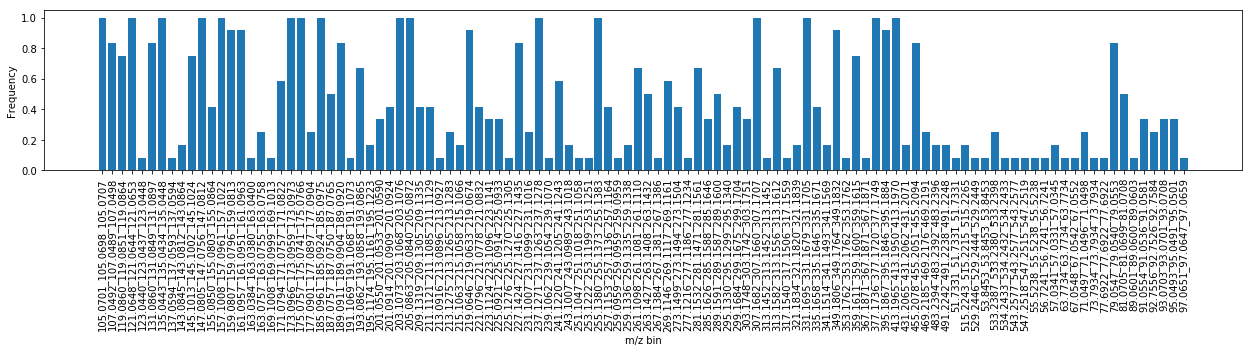

In [7]:
# for plotting the histogram of your cluster of interest
%matplotlib inline
tree.cluster_hist(cluster=82)

#### If the dendogram cutoff level was unsuitable for your data, you can apply a new level and scrutinise the new clusters below.

In [8]:
# Show the number of clusters before adjustment
print("BEFORE: Cutoff:", tree.cutoff, "n clusters:", len(set(tree.clusters)))

# Re-set a new cutoff for clusters
new_tree=copy.deepcopy(tree)
new_tree.cut_tree(cutoff=0.97)

# Show number of clusters after adjustment
print("AFTER: Cutoff:", new_tree.cutoff, "n clusters:", len(set(new_tree.clusters)))

BEFORE: Cutoff: 0.7 n clusters: 222
AFTER: Cutoff: 0.97 n clusters: 81


In [9]:
# Generate the out plots and tables of the new clusters.
# rename a new directory.
# To write out the new tree.
os.makedirs("results-cutoff-097", exist_ok=False)
new_tree.write_summaries(path="results-cutoff-097")
new_tree.plot(filename="results-cutoff-097/simple_dendrogram.html", width=900, height=1200);

#### View the original (iplot1) and new (iplot2) cutoffs below

In [10]:
# View the new dendrogram cutoff inline
# for visualising plot inline
plotly.offline.init_notebook_mode(connected=True) 
iplot1 = tree.plot(width=800, height=900)
plotly.offline.iplot(iplot1)

In [11]:
iplot2 = new_tree.plot(width=800, height=900)
plotly.offline.iplot(iplot2)

#### Scrutinise the new clusters for your analytes below

In [12]:
# return the cluster number for which the queried analyte belongs
new_tree.cluster_map["Ppyr_hemolymph_extract_533.237884521484_15.123002"]

13

In [13]:
# for visualising the ion table of your cluster of interest
new_tree.cluster_table(cluster=13)

bins                                              100.0761_100.0757_100.0766  \
component                                                                      
Ppyr_hemolymph_extract_1065.4677734375_15.366083                       False   
Ppyr_hemolymph_extract_1082.49475097656_15.123002                      False   
Ppyr_hemolymph_extract_1082.49487304687_21.307386                      False   
Ppyr_hemolymph_extract_1082.49499511718_15.366083                      False   
Ppyr_hemolymph_extract_1082.49517822265_19.965233                      False   
Ppyr_hemolymph_extract_1082.49530029296_18.991166                      False   
Ppyr_hemolymph_extract_1100.50646972656_18.35508                       False   
Ppyr_hemolymph_extract_1110.52667236328_17.431269                      False   
Ppyr_hemolymph_extract_1114.52197265625_19.262445                      False   
Ppyr_hemolymph_extract_434.25390625_13.471111                           True   
Ppyr_hemolymph_extract_436.269439697265_13.538295                       True   
Ppyr_hemolymph_extract_452.264434814453_8.0686129                       True   
Ppyr_hemolymph_extract_453.296081542968_13.538295                       True   
Ppyr_hemolymph_extract_469.291137695312_8.0686129                       True   
Ppyr_hemolymph_extract_491.227569580078_12.962671                      False   
Ppyr_hemolymph_extract_491.227600097656_13.224755                      False   
Ppyr_hemolymph_extract_491.227661132812_10.204906                      False   
Ppyr_hemolymph_extract_491.228057861328_11.943648                      False   
Ppyr_hemolymph_extract_507.222839355468_13.718764                      False   
Ppyr_hemolymph_extract_517.243591308593_15.954252                      False   
Ppyr_hemolymph_extract_524.249481201171_13.718764                      False   
Ppyr_hemolymph_extract_531.222991943359_16.840886                      False   
Ppyr_hemolymph_extract_533.237884521484_15.123002                      False   
Ppyr_hemolymph_extract_533.238098144531_15.366083                      False   
Ppyr_hemolymph_extract_535.254180908203_12.579138                      False   
Ppyr_hemolymph_extract_547.253814697265_17.719947                      False   
Ppyr_hemolymph_extract_547.254028320312_17.431269                      False   
Ppyr_hemolymph_extract_547.254211425781_17.046113                      False   
Ppyr_hemolymph_extract_549.233520507812_15.795523                      False   
Ppyr_hemolymph_extract_550.264221191406_15.123002                      False   
Ppyr_hemolymph_extract_550.264404296875_15.366083                      False   
Ppyr_hemolymph_extract_561.269348144531_18.878158                      False   
Ppyr_hemolymph_extract_561.269470214843_19.784291                      False   
Ppyr_hemolymph_extract_561.26953125_19.535629                          False   
Ppyr_hemolymph_extract_561.269592285156_20.078779                      False   
Ppyr_hemolymph_extract_564.280212402343_17.719947                      False   
Ppyr_hemolymph_extract_564.280517578125_17.431269                      False   
Ppyr_hemolymph_extract_574.264343261718_15.123002                      False   
Ppyr_hemolymph_extract_578.295959472656_18.878158                      False   
Ppyr_hemolymph_extract_578.296081542968_19.784291                      False   

bins                                              1029.4494_1029.4494_1029.4494  \
component                                                                         
Ppyr_hemolymph_extract_1065.4677734375_15.366083                          False   
Ppyr_hemolymph_extract_1082.49475097656_15.123002                         False   
Ppyr_hemolymph_extract_1082.49487304687_21.307386                          True   
Ppyr_hemolymph_extract_1082.49499511718_15.366083                         False   
Ppyr_hemolymph_extract_1082.49517822265_19.965233                         False   
Ppyr_hemolymph_extract_1082.49530029296_18.991166         

(<Figure size 3538.8x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xbba14e0>)

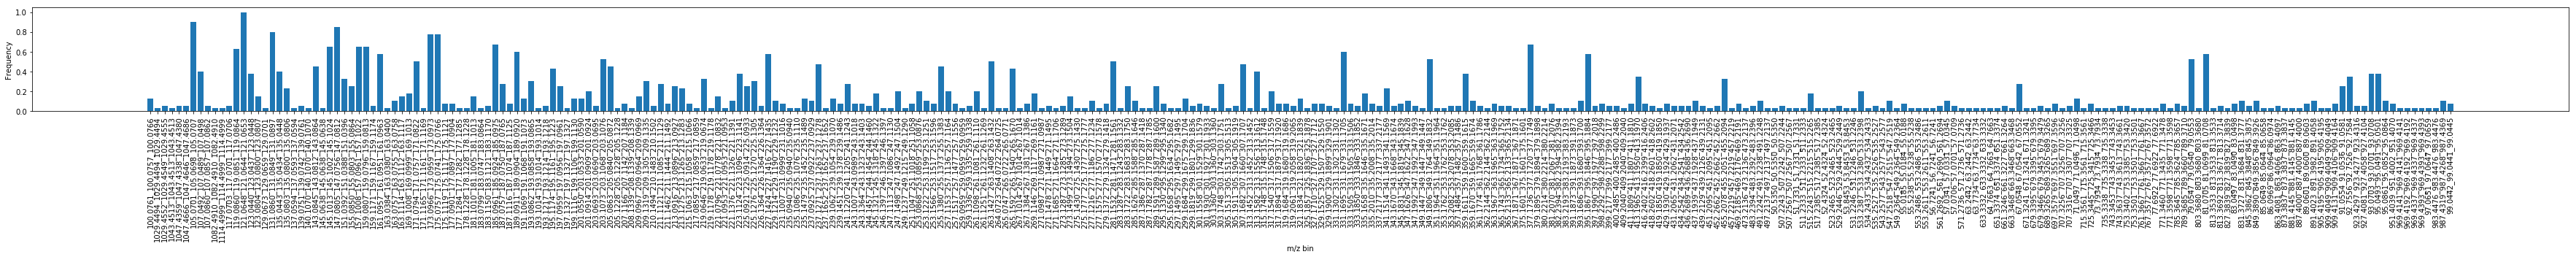

In [14]:
# for plotting the histogram of your cluster of interest
%matplotlib inline
new_tree.cluster_hist(cluster=13)

## Output dendrogram as image

In [16]:
from BioDendro.plot import dendrogram
plotly.offline.init_notebook_mode(connected=False)
iplot = dendrogram(tree, width=800, height=1000, title="TreesRCool", xlabel="Samples", ylabel="Distance")
plotly.offline.iplot(iplot, image = 'svg', filename='plot_image')

In [17]:
plotly.offline.plot(iplot, image='svg', image_filename='test', image_height=1200, image_width=1200)

'temp-plot.html'